## Clustering - Tipos de clientes
**Utilizo el Dataframe analizado previamente**

In [39]:
import pandas as pd
customer = pd.read_csv('customer_fecha.csv')
customer

,CustomerID,cantidad_compras,cantidad_productos,total_facturado,primera_compra,ultima_compra,pais
0,12346.0,2,0,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00,3950
1,12347.0,7,2458,4310.00,2010-12-07 14:57:00,2011-12-07 15:52:00,1
2,12348.0,4,2341,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00,12
3,12349.0,1,631,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00,15
4,12350.0,1,197,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,10
...,...,...,...,...,...,...,...
4367,18280.0,1,45,180.60,2011-03-07 09:52:00,2011-03-07 09:52:00,3950
4368,18281.0,1,54,80.82,2011-06-12 10:53:00,2011-06-12 10:53:00,3950
4369,18282.0,3,98,176.60,2011-08-05 13:35:00,2011-12-02 11:43:00,3950
4370,18283.0,16,1357,2045.53,2011-01-06 14:14:00,2011-12-06 12:02:00,3950


### Transformación de variables

In [40]:
customer['primera_compra'] = pd.to_datetime(customer['primera_compra']).dt.date
customer['ultima_compra'] = pd.to_datetime(customer['ultima_compra']).dt.date
customer['dias_compras'] =customer ['ultima_compra'] - customer['primera_compra']
customer

,CustomerID,cantidad_compras,cantidad_productos,total_facturado,primera_compra,ultima_compra,pais,dias_compras
0,12346.0,2,0,0.00,2011-01-18,2011-01-18,3950,0 days
1,12347.0,7,2458,4310.00,2010-12-07,2011-12-07,1,365 days
2,12348.0,4,2341,1797.24,2010-12-16,2011-09-25,12,283 days
3,12349.0,1,631,1757.55,2011-11-21,2011-11-21,15,0 days
4,12350.0,1,197,334.40,2011-02-02,2011-02-02,10,0 days
...,...,...,...,...,...,...,...,...
4367,18280.0,1,45,180.60,2011-03-07,2011-03-07,3950,0 days
4368,18281.0,1,54,80.82,2011-06-12,2011-06-12,3950,0 days
4369,18282.0,3,98,176.60,2011-08-05,2011-12-02,3950,119 days
4370,18283.0,16,1357,2045.53,2011-01-06,2011-12-06,3950,334 days


In [41]:
customer['dias_compras'] = customer['dias_compras'].dt.days
customer['CustomerID'] = customer['CustomerID'].astype(int)
customer = customer.set_index('CustomerID')
customer

,cantidad_compras,cantidad_productos,total_facturado,primera_compra,ultima_compra,pais,dias_compras
CustomerID,,,,,,,
12346,2,0,0.00,2011-01-18,2011-01-18,3950,0
12347,7,2458,4310.00,2010-12-07,2011-12-07,1,365
12348,4,2341,1797.24,2010-12-16,2011-09-25,12,283
12349,1,631,1757.55,2011-11-21,2011-11-21,15,0
12350,1,197,334.40,2011-02-02,2011-02-02,10,0
...,...,...,...,...,...,...,...
18280,1,45,180.60,2011-03-07,2011-03-07,3950,0
18281,1,54,80.82,2011-06-12,2011-06-12,3950,0
18282,3,98,176.60,2011-08-05,2011-12-02,3950,119


In [42]:
customer = customer.drop('primera_compra', axis =1)
customer = customer.drop('ultima_compra', axis =1)
customer

,cantidad_compras,cantidad_productos,total_facturado,pais,dias_compras
CustomerID,,,,,
12346,2,0,0.00,3950,0
12347,7,2458,4310.00,1,365
12348,4,2341,1797.24,12,283
12349,1,631,1757.55,15,0
12350,1,197,334.40,10,0
...,...,...,...,...,...
18280,1,45,180.60,3950,0
18281,1,54,80.82,3950,0
18282,3,98,176.60,3950,119


### Análisis exploratorio

In [43]:
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [44]:
customer.describe()


,cantidad_compras,cantidad_productos,total_facturado,pais,dias_compras
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,5.075480,1119.133349,1893.531433,3573.328911,133.723010
std,9.338754,4672.995712,8218.696204,1152.597959,133.000474
min,1.000000,-303.000000,-4287.630000,1.000000,0.000000
25%,1.000000,151.750000,291.795000,3950.000000,0.000000
50%,3.000000,364.000000,644.070000,3950.000000,98.000000
75%,5.000000,956.250000,1608.335000,3950.000000,256.000000
max,248.000000,196719.000000,279489.020000,3950.000000,373.000000


#### En base a los estadísticos básicos de la función Describe, analizo la cantidad de compras por clientes para realizar un agrupamiento

### Cantidad_Compras

In [45]:
customer[customer["total_facturado"] <= 0].shape

(50, 5)

In [46]:
customer.loc[(customer["cantidad_compras"] > 5) & (customer["cantidad_compras"] < 15)].shape

(820, 5)

In [47]:
customer.loc[(customer["cantidad_compras"] > 15) & (customer["cantidad_compras"] < 25)].shape

(135, 5)

In [48]:
customer.loc[(customer["cantidad_compras"] > 25) & (customer["cantidad_compras"] < 35)].shape

(50, 5)

In [49]:
customer.loc[(customer["cantidad_compras"] > 35) & (customer["cantidad_compras"] < 50)].shape

(20, 5)

In [50]:
customer.loc[(customer["cantidad_compras"] > 50) & (customer["cantidad_compras"] < 100)].shape

(18, 5)

In [51]:
customer.loc[(customer["cantidad_compras"] > 100) & (customer["cantidad_compras"] < 300)].shape

(6, 5)

In [52]:
customer_index=customer[customer["cantidad_productos"] <= 0].index
customer=customer.drop(customer_index) # Elimino los negativos ya que son inconsistencias
customer

,cantidad_compras,cantidad_productos,total_facturado,pais,dias_compras
CustomerID,,,,,
12347,7,2458,4310.00,1,365
12348,4,2341,1797.24,12,283
12349,1,631,1757.55,15,0
12350,1,197,334.40,10,0
12352,11,470,1545.41,10,260
...,...,...,...,...,...
18280,1,45,180.60,3950,0
18281,1,54,80.82,3950,0
18282,3,98,176.60,3950,119


In [53]:
#En base a los estadísticos básicos genero agrupamientos
#min 1, 25% 1 , 50% 3, 75% 6, max 248   
customer.loc[(customer["cantidad_compras"] > 0) & (customer["cantidad_compras"] <= 1), "cantidad_compras"] = 1   
customer.loc[(customer["cantidad_compras"] > 1) & (customer["cantidad_compras"] <= 2), "cantidad_compras"] = 2
customer.loc[(customer["cantidad_compras"] > 2) & (customer["cantidad_compras"] <= 3),"cantidad_compras"]= 3    
customer.loc[(customer["cantidad_compras"] > 3) & (customer["cantidad_compras"] <= 4),"cantidad_compras"] = 4   
customer.loc[(customer["cantidad_compras"] > 4) & (customer["cantidad_compras"] <= 5),"cantidad_compras"] = 5
customer.loc[(customer["cantidad_compras"] > 5) & (customer["cantidad_compras"] <= 6),"cantidad_compras"] = 6
customer.loc[(customer["cantidad_compras"] > 6) & (customer["cantidad_compras"] <= 10),"cantidad_compras"] = 7
customer.loc[(customer["cantidad_compras"] > 10) & (customer["cantidad_compras"] <= 15),"cantidad_compras"] = 8
customer.loc[(customer["cantidad_compras"] > 15) & (customer["cantidad_compras"] <= 25),"cantidad_compras"] = 9
customer.loc[(customer["cantidad_compras"] > 25) & (customer["cantidad_compras"] <= 35),"cantidad_compras"] = 10
customer.loc[(customer["cantidad_compras"] > 35) & (customer["cantidad_compras"] <= 50),"cantidad_compras"] = 11
customer.loc[(customer["cantidad_compras"] > 50) & (customer["cantidad_compras"] <= 100),"cantidad_compras"] = 12
customer.loc[(customer["cantidad_compras"] > 100) & (customer["cantidad_compras"] <= 300),"cantidad_compras"] = 13
customer.describe()
    

,cantidad_compras,cantidad_productos,total_facturado,pais,dias_compras
count,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000
mean,3.603380,1133.286177,1919.596090,3575.065987,135.034267
std,2.685955,4699.822017,8265.251109,1150.163461,133.052934
min,1.000000,1.000000,-43.400000,1.000000,0.000000
25%,1.000000,158.000000,300.840000,3950.000000,0.000000
50%,3.000000,372.000000,653.350000,3950.000000,102.000000
75%,6.000000,978.000000,1624.175000,3950.000000,258.000000
max,13.000000,196719.000000,279489.020000,3950.000000,373.000000


### Total_facturado

In [54]:
customer.loc[(customer["total_facturado"] <=0), "total_facturado"].shape

(4,)

In [55]:
customer.loc[(customer["total_facturado"] > 0) & (customer["total_facturado"] <= 350), "total_facturado"].shape

(1321,)

In [56]:
customer.loc[(customer["total_facturado"] > 350) & (customer["total_facturado"] <= 700), "total_facturado"].shape

(938,)

In [57]:
customer.loc[(customer["total_facturado"] > 700) & (customer["total_facturado"] <= 1400), "total_facturado"].shape

(826,)

In [58]:
customer.loc[(customer["total_facturado"] > 1400) & (customer["total_facturado"] <= 2800), "total_facturado"].shape

(652,)

In [59]:
customer.loc[(customer["total_facturado"] > 2800) & (customer["total_facturado"] <= 5600), "total_facturado"].shape

(359,)

In [60]:
customer.loc[(customer["total_facturado"] > 5600) & (customer["total_facturado"] <= 11200), "total_facturado"].shape

(142,)

In [61]:
customer.loc[(customer["total_facturado"] > 11200), "total_facturado"].shape

(77,)

In [62]:
customer_index=customer[customer["total_facturado"] <= 0].index
customer=customer.drop(customer_index)  # Elimino los negativos y ceros ya que son inconsistencias
customer

,cantidad_compras,cantidad_productos,total_facturado,pais,dias_compras
CustomerID,,,,,
12347,7,2458,4310.00,1,365
12348,4,2341,1797.24,12,283
12349,1,631,1757.55,15,0
12350,1,197,334.40,10,0
12352,8,470,1545.41,10,260
...,...,...,...,...,...
18280,1,45,180.60,3950,0
18281,1,54,80.82,3950,0
18282,3,98,176.60,3950,119


In [63]:
#En base a los estadísticos básicos defino el agrupamiento
#min 2,9, 25% 301 , 50% 653, 75% 1625, max 279.489
customer.loc[(customer["total_facturado"] > 0) & (customer["total_facturado"] <= 350), "total_facturado"] = 10   
customer.loc[(customer["total_facturado"] > 350) & (customer["total_facturado"] <= 700), "total_facturado"] = 20
customer.loc[(customer["total_facturado"] > 700) & (customer["total_facturado"] <= 1400),"total_facturado"]= 40    
customer.loc[(customer["total_facturado"] > 1400) & (customer["total_facturado"] <= 2800),"total_facturado"] = 80   
customer.loc[(customer["total_facturado"] > 2800) & (customer["total_facturado"] <= 5600),"total_facturado"] = 160
customer.loc[(customer["total_facturado"] > 5600),"total_facturado"] = 320

customer.describe()

,cantidad_compras,cantidad_productos,total_facturado,pais,dias_compras
count,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000
mean,3.604867,1131.405794,56.706837,3574.718424,135.055620
std,2.686670,4698.702498,74.185586,1150.639870,133.079294
min,1.000000,1.000000,10.000000,1.000000,0.000000
25%,1.000000,158.000000,10.000000,3950.000000,0.000000
50%,3.000000,372.000000,20.000000,3950.000000,102.000000
75%,6.000000,978.000000,80.000000,3950.000000,258.000000
max,13.000000,196719.000000,320.000000,3950.000000,373.000000


## Matriz de gráficos

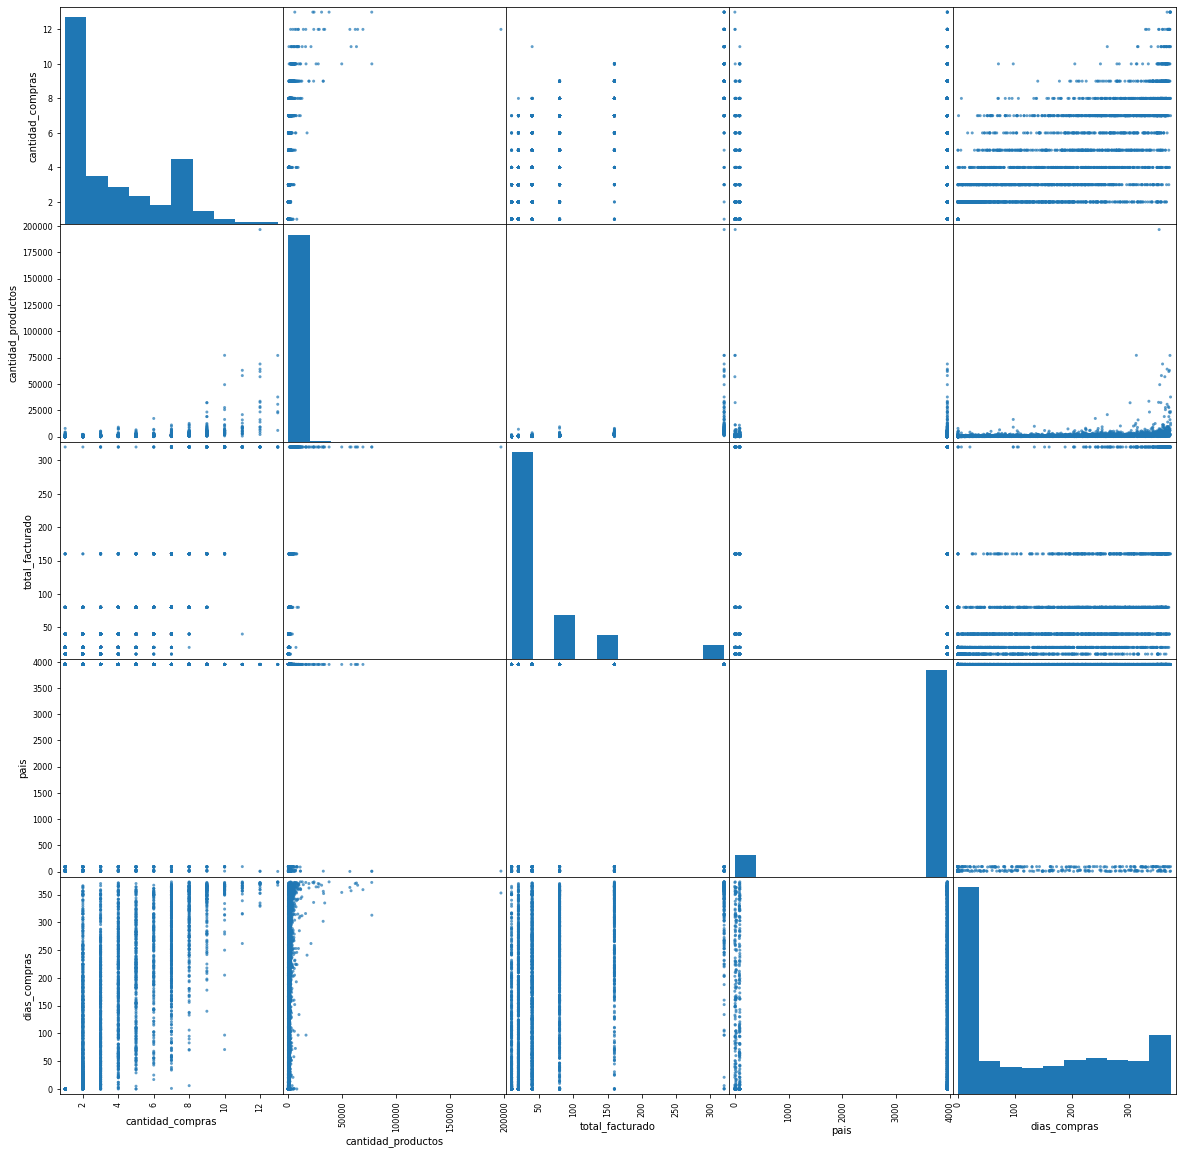

In [64]:
import seaborn as sns
_=pd.plotting.scatter_matrix(customer.iloc[:,0:7],figsize=(20, 20), alpha=0.7) 

### Analizo Outliers

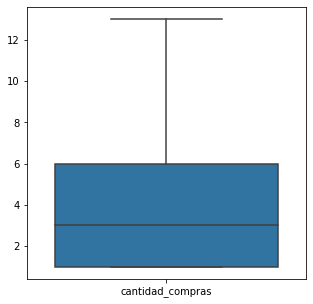

In [76]:
plt.figure(figsize = (5, 5))
sns.boxplot( data = customer[['cantidad_compras']]);

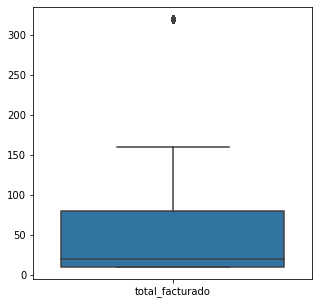

In [66]:
plt.figure(figsize = (5, 5))
sns.boxplot( data = customer[['total_facturado']]);

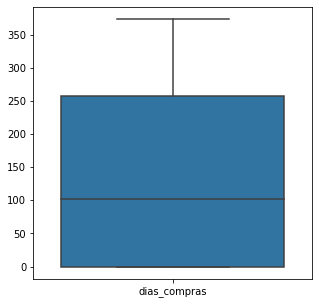

In [67]:
plt.figure(figsize = (5, 5))
sns.boxplot( data = customer[['dias_compras']]);

## Matriz de Correlación

In [77]:
import plotly.express as px
px.imshow(customer.corr(), text_auto=True)

In [138]:
customer = customer[['dias_compras', 'total_facturado', 'cantidad_compras']].copy() 
customer.describe()

,dias_compras,total_facturado,cantidad_compras
count,4315.000000,4315.000000,4315.000000
mean,135.055620,56.706837,3.604867
std,133.079294,74.185586,2.686670
min,0.000000,10.000000,1.000000
25%,0.000000,10.000000,1.000000
50%,102.000000,20.000000,3.000000
75%,258.000000,80.000000,6.000000
max,373.000000,320.000000,13.000000


## Escalado - StandarScaler

In [127]:
rfm_escalado = customer
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
rfm_escalado = pd.DataFrame(scaler.fit_transform(customer))
rfm_escalado.columns = customer.columns
rfm_escalado

,dias_compras,total_facturado,cantidad_compras
0,1.728075,1.392523,1.263842
1,1.111830,0.314021,0.147089
2,-1.014968,0.314021,-0.969665
3,-1.014968,-0.629667,-0.969665
4,0.938980,0.314021,1.636093
...,...,...,...
4310,-1.014968,-0.629667,-0.969665
4311,-1.014968,-0.629667,-0.969665
4312,-0.120661,-0.629667,-0.225162
4313,1.495104,0.314021,2.008344


# K - means

In [104]:
from sklearn.cluster import KMeans

def elbow_method(df, max_clusters=20):
    range_num_clusters = list(range(2, max_clusters))
    kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range_num_clusters]

    inertias = [kmeans_tests[i].fit(df).inertia_ for i in range(len(range_num_clusters))]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=range_num_clusters,
                             y=inertias,
                             mode='lines+markers',
                             name='lines+markers'))
    fig.update_yaxes(title_text="Inercia")
    return fig

In [85]:
import numpy 
numpy.__version__ 
'1.21.4' 

'1.21.4'

In [129]:
elbow_method(rfm_escalado)

# Coeficiente silhouette:

# $𝑠(𝑥) = \frac{(𝑏(𝑥) − 𝑎(𝑥))}{max(𝑎(x), 𝑏(𝑥))}$

con

<img title="a title" alt="Alt text" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/71ae733cc90f36f4a6352d347dc35e4bb4b577eb">

(Estoy cerca de los puntos de mi grupo?)
<br>

<img title="a title" alt="Alt text" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/991dfa7304dfb820b6cd07ead24725634fc763bf">

(Estoy lejos de los otros grupos?)

In [106]:
from sklearn.metrics import silhouette_score

def silhouette(df, max_clusters=20):
    range_num_clusters = list(range(2, max_clusters))
    kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range_num_clusters]

    silhouettes = [silhouette_score(df, kmeans_tests[i].fit_predict(df)) for i in range(len(range_num_clusters))]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=range_num_clusters,
                             y=silhouettes,
                             mode='lines+markers',
                             name='lines+markers'))
    fig.update_yaxes(title_text="Silhouette avg")
    return fig

In [130]:
silhouette(rfm_escalado)

In [108]:
def ScoreSilhouette(df):
    ssd =[]

    K = range(2, 20)

    for k in K:
        model = KMeans(n_clusters=k)
        model.fit(df)
        ssd.append(model.inertia_)
        print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

In [109]:
ScoreSilhouette(rfm_escalado)

Silhouette Score for 2 clusters: 0.5570157615097558
Silhouette Score for 3 clusters: 0.5432281234680946
Silhouette Score for 4 clusters: 0.5274479821159368
Silhouette Score for 5 clusters: 0.4927793556692549
Silhouette Score for 6 clusters: 0.5007614942163444
Silhouette Score for 7 clusters: 0.49196125154580866
Silhouette Score for 8 clusters: 0.49619203252567884
Silhouette Score for 9 clusters: 0.480001406259964
Silhouette Score for 10 clusters: 0.4680516240313503
Silhouette Score for 11 clusters: 0.4700363481152844
Silhouette Score for 12 clusters: 0.4637634673580054
Silhouette Score for 13 clusters: 0.4691272748872871
Silhouette Score for 14 clusters: 0.4803034833339083
Silhouette Score for 15 clusters: 0.4788855793473242
Silhouette Score for 16 clusters: 0.48396819449918993
Silhouette Score for 17 clusters: 0.4851205426202905
Silhouette Score for 18 clusters: 0.4823321439612683
Silhouette Score for 19 clusters: 0.4758879217219055


In [110]:
from yellowbrick.cluster import SilhouetteVisualizer

def graficarSilhouette(df, model):
  

  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizer.fit(df)
  visualizer.show()

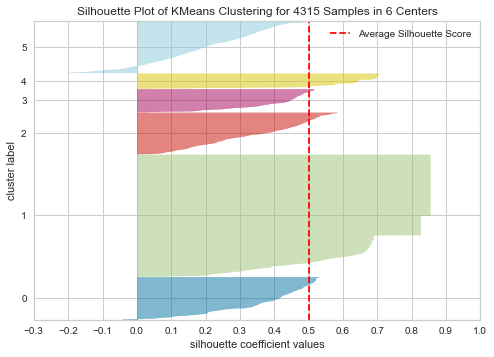

In [131]:
graficarSilhouette(rfm_escalado, KMeans(n_clusters=6, n_init=10)) # Elijo 6 clusters

### Análisis de clusters

In [132]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=6, n_init=10)
model.fit_predict(rfm_escalado) # genero los 6 clusters
centers = model.cluster_centers_
centers

array([[ 1.12010546,  1.39894265,  1.38017057],
       [-0.96468637, -0.5308199 , -0.85390858],
       [ 0.92034183, -0.34062368, -0.11792441],
       [ 1.39706222,  3.54952615,  2.03908063],
       [-0.23257368, -0.22647764, -0.03312801],
       [ 1.08300729,  0.13412454,  1.16607305]])

In [133]:
rfm_escalado['cluster'] =model.labels_ # escalado, para hacer el grafico de radar

fig = go.Figure()
for i in range(4):

  fig.add_trace(go.Scatterpolar(
      r=rfm_escalado[rfm_escalado['cluster'] == i].median()[0:-1].values,
      theta=rfm_escalado.columns[0:-1],
      fill='toself',
      name=str(i)
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True
)

fig.show()

### Volver al DataFrame sin escalado

In [134]:
rfm_escalado = rfm_escalado.drop('cluster', axis =1)
rfm_=pd.DataFrame(scaler.inverse_transform(rfm_escalado))
rfm_.columns=customer.columns
rfm_['customerID']= customer.index
rfm_['cluster'] = model.labels_


C:\Users\juarezg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



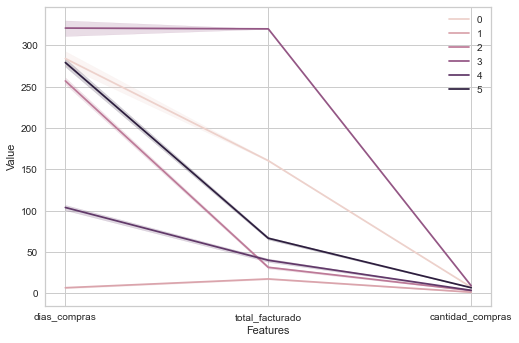

In [137]:
grafico_cluster = pd.melt(rfm_.reset_index(),
                         id_vars = ['customerID','cluster'],
                         value_vars =['dias_compras', 'total_facturado', 'cantidad_compras'],
                         var_name='Features',
                         value_name ='Value')
sns.lineplot('Features','Value', hue='cluster', data= grafico_cluster)
plt.legend()



In [139]:
rfm_.groupby('cluster').agg({
    'dias_compras':['mean','median','min','max'],
    'total_facturado':['mean','median','min','max'],
    'cantidad_compras':['mean','median','min','max']})

dias_compras                      total_facturado                \
                mean median    min    max            mean median    min   
cluster                                                                   
0         284.101190  308.0    0.0  373.0      160.476190  160.0  160.0   
1           6.690716    0.0    0.0   91.0       17.332215   10.0   10.0   
2         257.006601  248.0  173.0  371.0       31.402640   20.0   10.0   
3         320.954128  352.0    0.0  373.0      320.000000  320.0  320.0   
4         103.823373  106.0    0.0  188.0       39.960159   40.0   10.0   
5         279.236156  286.5   71.0  370.0       66.612378   80.0   10.0   

               cantidad_compras                    
           max             mean median  min   max  
cluster                                            
0        320.0         7.312500    8.0  1.0  10.0  
1        160.0         1.310962    1.0  1.0   3.0  
2         80.0         3.280528    3.0  2.0   5.0  
3        320.0         9.082569    9.0  2.0  13.0  
4        160.0         3.520584    3.0  2.0   7.0  
5         80.0         6.734528    7.0  5.0  11.0

In [140]:
rfm_['cluster'].value_counts()

1    1788
4     753
5     614
2     606
0     336
3     218
Name: cluster, dtype: int64

In [141]:
# va despues de la definición
fig = px.scatter_3d(rfm_, x='dias_compras', y='total_facturado', color='cluster', z='cantidad_compras')
fig.show()

In [142]:
rfm_ # se comorta mucho más estable K-means que K-Medoids

,dias_compras,total_facturado,cantidad_compras,customerID,cluster
0,365.0,160.0,7.0,12347,0
1,283.0,80.0,4.0,12348,2
2,0.0,80.0,1.0,12349,1
3,0.0,10.0,1.0,12350,1
4,260.0,80.0,8.0,12352,5
...,...,...,...,...,...
4310,0.0,10.0,1.0,18280,1
4311,0.0,10.0,1.0,18281,1
4312,119.0,10.0,3.0,18282,4
4313,334.0,80.0,9.0,18283,5


# KMedoids 

In [150]:
df_med =rfm_escalado
df_med

,dias_compras,total_facturado,cantidad_compras
0,1.728075,1.392523,1.263842
1,1.111830,0.314021,0.147089
2,-1.014968,0.314021,-0.969665
3,-1.014968,-0.629667,-0.969665
4,0.938980,0.314021,1.636093
...,...,...,...
4310,-1.014968,-0.629667,-0.969665
4311,-1.014968,-0.629667,-0.969665
4312,-0.120661,-0.629667,-0.225162
4313,1.495104,0.314021,2.008344


In [148]:
from sklearn_extra.cluster import KMedoids 

def elbow_method_kmedioids(df, max_clusters=20):
    range_num_clusters = list(range(2, max_clusters))
    kmed_tests = [KMedoids(n_clusters=i) for i in range_num_clusters]

    inertias = [kmed_tests[i].fit(df).inertia_ for i in range(len(range_num_clusters))]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=range_num_clusters,
                             y=inertias,
                             mode='lines+markers',
                             name='lines+markers'))
    fig.update_yaxes(title_text="Inercia")
    return fig

In [149]:
elbow_method_kmedioids(df_med)

C:\Users\juarezg\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning:

Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).

C:\Users\juarezg\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning:

Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).

C:\Users\juarezg\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning:

Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).

C:\Users\juarezg\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning:

Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).

C:\Users\juarezg\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid

In [151]:

from sklearn.metrics import silhouette_score

def silhouette_kmed(data, max_clusters=20):
    
    range_num_clusters = list(range(2, max_clusters))
    kmed_tests = [KMedoids(n_clusters=i,  random_state=42, init='k-medoids++') for i in range_num_clusters]

    silhouettes = [silhouette_score(data, kmed_tests[i].fit_predict(data)) for i in range(len(range_num_clusters))]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(2, max_clusters)),
                             y=silhouettes,
                             mode='lines+markers',
                             name='lines+markers'))
    fig.update_yaxes(title_text="Silhouette avg")
    return fig



In [152]:
silhouette_kmed(df_med)

In [156]:
model = KMedoids(n_clusters=7, random_state=42, init='k-medoids++')
model.fit_predict(df_med)

array([0, 4, 1, ..., 2, 5, 2], dtype=int64)

In [72]:
!pip install scikit-learn-extra

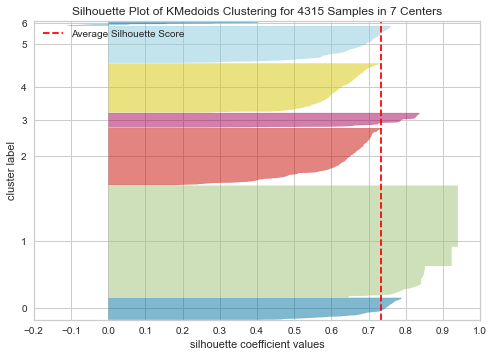

In [157]:
graficarSilhouette(df_med, model ) #

In [165]:
df_med['label'] = KMedoids(n_clusters=7, random_state=42, init='k-medoids++').fit_predict(df_med)
df_med

,dias_compras,total_facturado,cantidad_compras,label
0,1.728075,1.392523,1.263842,0
1,1.111830,0.314021,0.147089,6
2,-1.014968,0.314021,-0.969665,2
3,-1.014968,-0.629667,-0.969665,2
4,0.938980,0.314021,1.636093,5
...,...,...,...,...
4310,-1.014968,-0.629667,-0.969665,2
4311,-1.014968,-0.629667,-0.969665,2
4312,-0.120661,-0.629667,-0.225162,1
4313,1.495104,0.314021,2.008344,5


In [168]:
df_med.label.value_counts()

2    1642
1     837
5     573
6     415
0     320
3     309
4     219
Name: label, dtype: int64

In [166]:

fig = go.Figure()
for i in range(5):

  fig.add_trace(go.Scatterpolar(
      r=df_med[df_med['label'] == i].median()[0:-1].values,
      theta=df_med.columns[0:-1],
      fill='toself',
      name=str(i)
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True
)

fig.show()